In [24]:
%reload_ext autoreload
%autoreload 2

from cleaner_rotcurves import *
from ploter import *
import matplotlib.pyplot as plt
import scipy

In [25]:
rotcurve_properties_df

,name,max_R,max_Vc
1,No name,22.320000,254.960000
2,100224,12.200000,263.320000
3,100253,7.483100,217.199997
4,100342,6.490000,198.970000
5,100598,14.950000,132.010000
...,...,...,...
225,611707,8.940000,98.440000
226,611861,10.550000,163.440000
227,611909,7.730000,158.730000
228,912391,12.500000,176.070000


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Galaxia 40: 105907'}, xlabel='R (Kpc)', ylabel='Vc (km/s)'>)

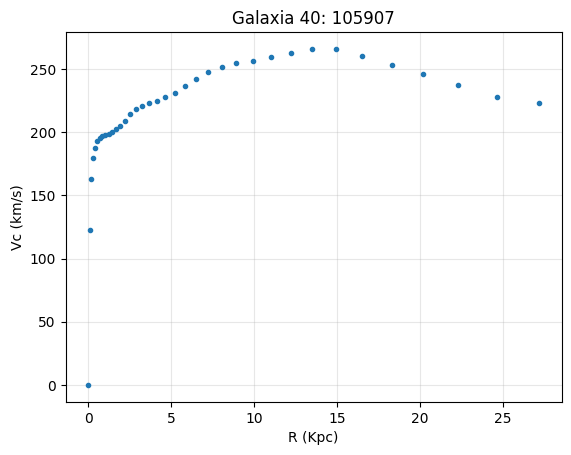

In [ ]:
# plot_rotcurve(40)

In [56]:
G = 4.3009172706e-3 # pc Msun^-1 (km/s)^2 ver https://en.wikipedia.org/wiki/Gravitational_constant
# Magnitud en banda B
def absolute_mag_B(v_max, galaxy_type):
    if galaxy_type == "a":
        a0 = 9.95
        a1 = 3.15
    elif galaxy_type == "b":
        a0 = 10.2
        a1 = 2.71
    elif galaxy_type == "c":
        a0 = 11.0
        a1 = 3.31

    M_B = -a0*np.log10(v_max) + a1
    return M_B

def Luminosity_B(M_B):
    M_B_sun = 5.48 # ver https://en.wikipedia.org/wiki/Apparent_magnitude (absolute magnitude)
    L_B = 10**(0.4*(M_B_sun - M_B)) #L_sun
    return L_B

def R25(M_B):
    log_R25 = -0.249*M_B - 4.0
    return 10**log_R25

def mass(v_max, R):
    mass = v_max**2*R/G
    return mass

def mass_gas(mass, galaxy_type):
    if galaxy_type == "a":
        return 0.04*mass
    elif galaxy_type == "b":
        return 0.08*mass
    else:
        return 0.16*mass

In [57]:
R25(10)

3.235936569296281e-07

In [60]:
df = rotcurve_properties_df

# Parte de clasificación
df["galaxy_type"] = "a"

# Parte de deducción según el tipo de galaxia
df["M_B"] = df.apply(lambda row: absolute_mag_B(row["max_Vc"], row["galaxy_type"]), axis=1)
df["L_B"] = df["M_B"].apply(Luminosity_B)
df["R25"] = df["M_B"].apply(R25)
df["mass"] = df.apply(lambda row: mass(row["max_Vc"], row["max_R"]), axis=1)
df["mass_R25"] = df.apply(lambda row: mass(row["max_Vc"], row["R25"]), axis=1)
df["mass_gas"] = df.apply(lambda row: mass_gas(row["mass"], row["galaxy_type"]), axis=1)

In [61]:
df

,name,max_R,max_Vc,galaxy_type,M_B,R25,mass,mass_gas,L_B,mass_R25
1,No name,22.320000,254.960000,a,-20.794397,15.059302,3.373473e+08,1.349389e+07,3.234140e+10,2.276082e+08
2,100224,12.200000,263.320000,a,-20.933814,16.312471,1.966828e+08,7.867313e+06,3.677272e+10,2.629822e+08
3,100253,7.483100,217.199997,a,-20.101755,10.123648,8.208052e+07,3.283221e+06,1.708843e+10,1.110441e+08
4,100342,6.490000,198.970000,a,-19.722937,8.147253,5.973912e+07,2.389565e+06,1.205521e+10,7.499379e+07
5,100598,14.950000,132.010000,a,-17.950038,2.948217,6.057505e+07,2.423002e+06,2.355132e+09,1.194571e+07
...,...,...,...,...,...,...,...,...,...,...
225,611707,8.940000,98.440000,a,-16.682057,1.425057,2.014279e+07,8.057116e+05,7.325259e+08,3.210809e+06
226,611861,10.550000,163.440000,a,-18.872916,5.004446,6.552516e+07,2.621006e+06,5.510186e+09,3.108219e+07
227,611909,7.730000,158.730000,a,-18.746557,4.654711,4.528313e+07,1.811325e+06,4.904818e+09,2.726777e+07
228,912391,12.500000,176.070000,a,-19.194569,6.017939,9.009893e+07,3.603957e+06,7.410163e+09,4.337679e+07


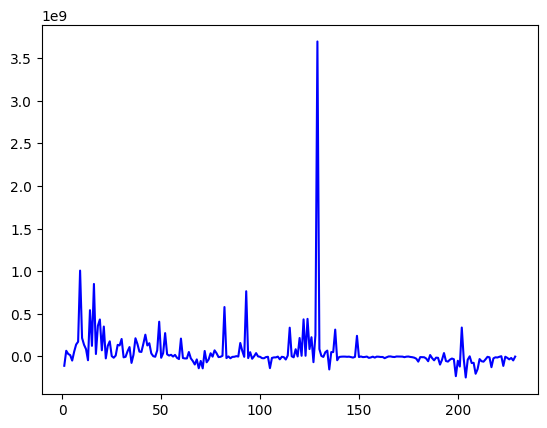

In [73]:
plt.plot(-df["mass"]+df["mass_R25"], c="b")